In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
assert X_train.shape == (60000, 28, 28)
assert y_train.shape == (60000,)

assert X_test.shape == (10000, 28, 28)
assert y_test.shape == (10000,)

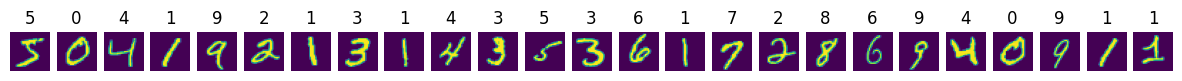

In [16]:
images_amount = 25

fig, ax = plt.subplots(1, images_amount, figsize=(15,10))

for i in range(0, images_amount):
    ax[i].set_title(y_train[i])
    ax[i].imshow(X_train[i])
    ax[i].axis('off')

#### Try to implement basic Neural Network to classify numbers

In [31]:
idxs = np.where((y_train == 0) | (y_train == 1))
y_train = y_train[idxs]
X_train = X_train[idxs]

In [30]:
test_idxs = np.where((y_test == 0) | (y_test == 1))
y_test = y_test[test_idxs]
X_test = X_test[test_idxs]

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
print(f"Train: min {X_train.min()}, max {X_train.max()}", )
print(f"Test: min {X_test.min()}, max {X_test.max()}", )

Train: min 0.0, max 1.0
Test: min 0.0, max 1.0


In [22]:
from keras.utils import to_categorical

In [36]:
y_test_cat = to_categorical(y_test)
y_train_cat = to_categorical(y_train)

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.losses import categorical_crossentropy
from keras.optimizers import gradient_descent_v2
from keras.metrics import accuracy

In [46]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(2, activation='sigmoid'))

optimizer = gradient_descent_v2.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss=categorical_crossentropy, metrics=accuracy)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=1)

396/396 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.0000e+00 - val_loss: 0.0210 - val_accuracy: 0.0000e+00


1/1 [==============================] - 0s 21ms/step


array([[0.11725686, 0.83968717]], dtype=float32)

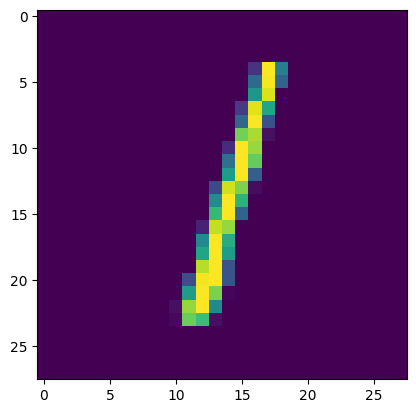

In [68]:
img_to_predict = np.array(X_test[0])
plt.imshow(img_to_predict)
model.predict(img_to_predict)